In [ ]:
"""Author: Melwyn D Souza, Reg No: R00209495"""

import h5py
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")
!cd "gdrive/My Drive/A2"
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
gdrive	sample_data


In [ ]:
#copied over from assigment pdf appendix
def loadDataH5():  
    with h5py.File('gdrive/My Drive/A2/earth_data.h5','r') as hf:
        trainX = np.array(hf.get('trainX'))
        trainY = np.array(hf.get('trainY'))
        valX = np.array(hf.get('valX'))
        valY = np.array(hf.get('valY'))
        # print (trainX.shape,trainY.shape)
        # print (valX.shape,valY.shape)
    return trainX, trainY, valX, valY


In [ ]:
def baseline():
  """baseline model with only one block (CNN > POOL) adn fully connected layers"""
  #block1
  input = keras.Input(shape=(64,64,3))
  conv = Conv2D(filters = 10, kernel_size = 3, activation = 'relu')(input)
  pool = MaxPool2D(pool_size = 2, strides = 2)(conv)
  #Fully connected
  flat = Flatten()(pool)
  dense = Dense(512, activation='relu')(flat)
  softmax = Dense(9, activation=tf.nn.softmax)(dense)
  model = keras.Model(inputs=input, outputs=softmax)
  return model

In [ ]:
def model1():
  """Model with two blocks and fully connected layer"""
  #block1
  input = keras.Input(shape=(64,64,3))
  conv1 = Conv2D(filters = 10, kernel_size = 3, activation = 'relu')(input)
  pool1 = MaxPool2D(pool_size = 2, strides = 2)(conv1)
  #block2
  conv2 = Conv2D(filters = 24, kernel_size = 5, activation = 'relu')(pool1)
  pool2 = MaxPool2D(pool_size = 2, strides = 2)(conv2)
  #fully connected 
  flat1 = Flatten()(pool2)
  dense1 = Dense(256, activation='relu')(flat1)
  softmax = Dense(9, activation=tf.nn.softmax)(dense1)
  model1 = keras.Model(inputs=input, outputs=softmax)
  return model1

In [ ]:
def model2():
  """model with 3 blocks and fully connected layer"""
  #block1
  input = keras.Input(shape=(64,64,3))
  conv1 = Conv2D(filters = 16, kernel_size = 5, activation = 'relu')(input)
  pool1 = MaxPool2D(pool_size = 3, strides = 1)(conv1)
  #block2
  conv2 = Conv2D(filters = 32, kernel_size = 3, activation = 'relu')(pool1)
  pool2 = MaxPool2D(pool_size = 2, strides = 2)(conv2)
  #block3
  conv3 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu')(pool2)
  pool3 = MaxPool2D(pool_size = 2, strides = 2)(conv3)
  #fully connected
  flat1 = Flatten()(pool3)
  dense1 = Dense(256, activation='relu')(flat1)
  softmax = Dense(9, activation=tf.nn.softmax)(dense1)
  model2 = keras.Model(inputs=input, outputs=softmax)
  return model2

In [ ]:
def model3():
  """model with 5 blocks and fully connected layer"""
  #block1
  input = keras.Input(shape=(64,64,3))
  conv1 = Conv2D(filters = 24, kernel_size = 4, activation = 'relu', padding = 'same')(input)
  pool1 = MaxPool2D(pool_size = 3, strides = 2)(conv1)
  #block2
  conv2 = Conv2D(filters = 48, kernel_size = 3, activation = 'relu', padding = 'same')(pool1)
  pool2 = MaxPool2D(pool_size = 3, strides = 2)(conv2)
  #block3
  conv3 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(pool2)
  pool3 = MaxPool2D(pool_size = 3, strides = 2)(conv3)
  #block4
  conv4 = Conv2D(filters = 64, kernel_size = 3, activation = 'relu', padding = 'same')(pool3)
  pool4 = MaxPool2D(pool_size = 3, strides = 2)(conv4)
  #block5
  conv5 = Conv2D(filters = 128, kernel_size = 3, activation = 'relu',padding = 'same')(pool4)
  pool5 = MaxPool2D(pool_size = 3, strides = 2)(conv5)
  #FC layer
  flat1 = Flatten()(pool5)
  dense1 = Dense(256, activation='relu')(flat1)
  softmax = Dense(9, activation=tf.nn.softmax)(dense1)
  model3 = keras.Model(inputs=input, outputs=softmax)
  return model3

In [ ]:
def dataGennerator(images,labels):
    """Generate data from the images, labels supplied as parameter"""
  
    trainDataGen = tf.keras.preprocessing.image.ImageDataGenerator(shear_range=0.1,
                                                                    zoom_range=0.1,
                                                                    rotation_range=20,
                                                                    horizontal_flip=True, 
                                                                    width_shift_range=0.1,
                                                                    height_shift_range=0.1,
                                                                    fill_mode = 'reflect')
                                                                    
    trainGen = trainDataGen.flow(images, labels, batch_size = 32)
    
    return trainGen

Epoch 1/20
600/600 [==============================] - 11s 17ms/step - loss: 1.2806 - accuracy: 0.5028 - val_loss: 0.9918 - val_accuracy: 0.6433
Epoch 2/20
600/600 [==============================] - 10s 16ms/step - loss: 0.8645 - accuracy: 0.6805 - val_loss: 0.7675 - val_accuracy: 0.7256
Epoch 3/20
600/600 [==============================] - 10s 16ms/step - loss: 0.7276 - accuracy: 0.7344 - val_loss: 0.7105 - val_accuracy: 0.7467
Epoch 4/20
600/600 [==============================] - 10s 16ms/step - loss: 0.6389 - accuracy: 0.7713 - val_loss: 0.4899 - val_accuracy: 0.8306
Epoch 5/20
600/600 [==============================] - 10s 17ms/step - loss: 0.5470 - accuracy: 0.8060 - val_loss: 0.6429 - val_accuracy: 0.7746
Epoch 6/20
600/600 [==============================] - 10s 16ms/step - loss: 0.4843 - accuracy: 0.8242 - val_loss: 0.4470 - val_accuracy: 0.8458
Epoch 7/20
600/600 [==============================] - 10s 16ms/step - loss: 0.4263 - accuracy: 0.8488 - val_loss: 0.4301 - val_accuracy:

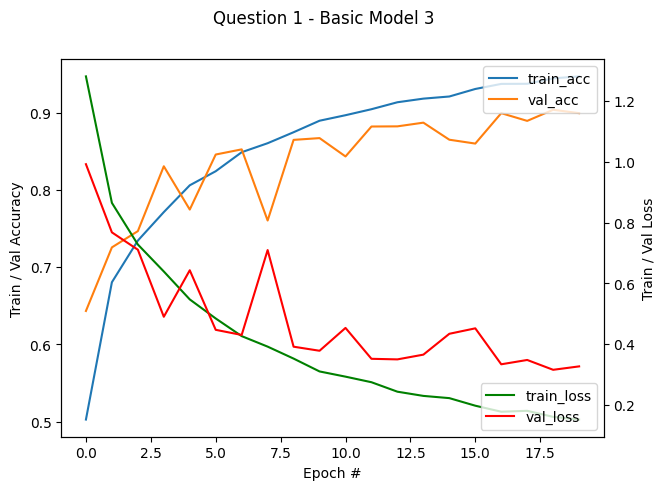

In [ ]:
def main():

  #set dataAug = True to enable data augmentation 
  dataAug = False
  tr_x, tr_y, val_x, val_y = loadDataH5()
  tr_x, val_x = tr_x/255, val_x/255 #Normalize data
  iters = 20 #epochs 
  batchsize = 32

  #uncomment the model which will be used in training and evaluation
  # model = baseline()
  # model = model1()
  # model = model2()
  model = model3()

  model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
 
  #use generated data if dataAug is enabled
  if dataAug == True:
    print("Data Augmenting")
    augmentedData = dataGennerator(tr_x, tr_y)  
    history = model.fit(augmentedData, epochs=iters, validation_data=(val_x, val_y), steps_per_epoch=len(tr_x)//batchsize)
  else:
    history = model.fit(tr_x, tr_y, epochs=iters,  validation_data=(val_x, val_y))

  #plotting accuracy and losses of training and validate data
  fig = plt.figure(figsize=(7,5))
  fig.suptitle("Question 1 - Basic Model 3")
  ax1 = fig.add_subplot()
  ax2 = ax1.twinx()
 
  ax2.plot(np.arange(0, iters), history.history["loss"], color='green', label="train_loss")
  ax2.plot(np.arange(0, iters), history.history["val_loss"], color='red', label="val_loss")
  ax1.plot(np.arange(0, iters), history.history["accuracy"], label="train_acc")
  ax1.plot(np.arange(0, iters), history.history["val_accuracy"], label="val_acc")
  ax1.set_ylabel("Train / Val Accuracy")
  ax2.set_ylabel("Train / Val Loss")
  ax1.set_xlabel("Epoch #")
  ax1.legend(loc ='upper right')
  ax2.legend(loc= 'lower right')
  plt.show()

main() 